In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [18]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Data/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [20]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [22]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [27]:
# Inspect the class to find the column names and types

inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [36]:
# Find the most recent date in the data set.

recent_date = session.query(func.max(Measurement.date)).scalar()
print(recent_date)

2017-08-23


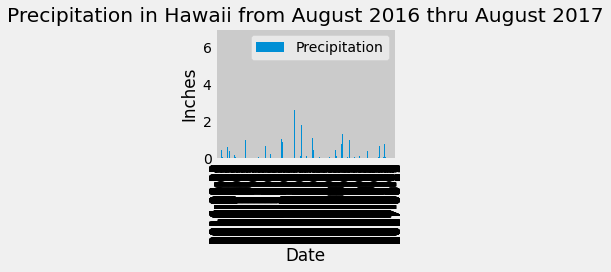

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores, ordered by date

rain_year = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date <= recent_date).\
        filter(Measurement.date >= query_date).\
        order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

rain_df = pd.DataFrame(rain_year, columns=['Date', 'Precipitation'])
rain_df.set_index('Date', inplace=True)
rain_fixed = rain_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data

rain_fixed.plot.bar()
plt.title('Precipitation in Hawaii from August 2016 thru August 2017')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks()

plt.tight_layout()
plt.show()


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()